In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.impute import KNNImputer


## Data Loading

In [2]:
## Data Loading
train_df = pd.read_csv("train_land_cover_assignment.csv")
test_df = pd.read_csv("test_land_cover_assignment.csv")
# Convert the dataframe to a GeoDataFrame
train_gdf = gpd.GeoDataFrame(
    train_df
)
test_gdf = gpd.GeoDataFrame(
    test_df

)


## Data Understanding

In [3]:
train_gdf.head()

,subid,lat,lon,building,cropland,wcover,bcount,x,y,bd20,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548937,7.387687,-4.780390,No,No,>60%,0.0,-2.714375e+06,321874.969864,1.4900,...,-4.781606,5052.299805,853.451416,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082
1,1548936,8.690266,-5.770243,No,Yes,<30%,0.0,-2.812625e+06,474124.973063,1.2925,...,-5.771476,5316.700195,933.074402,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431
2,1548935,8.518763,-2.808147,No,Yes,<30%,0.0,-2.495125e+06,440374.986977,1.3050,...,-2.809363,4519.700195,1186.817627,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131
3,1548934,8.637725,-3.048867,No,No,<30%,0.0,-2.520375e+06,454875.008083,1.3275,...,-3.050085,3439.800049,910.979309,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363
4,1548933,7.993474,-6.044227,No,No,<30%,0.0,-2.846625e+06,396624.944149,1.4200,...,-6.045455,5226.899902,802.602661,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859


In [4]:
test_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,mlon,nppm,npps,ph20,sirm,sirs,slope,snd20,soc20,tim
0,1548905,4.824505,-7.522892,NaN,-3.023125e+06,44125.021587,1.4075,250,2564,46,...,-7.524098,12909.700195,870.217346,5.025,0.719068,0.007398,4.093175,64.50,23.50,9.168183
1,1548829,5.457730,-5.010404,NaN,-2.749125e+06,104624.973824,1.6350,261,1378,71,...,-5.011604,12288.299805,839.143616,4.850,0.724049,0.007270,0.487844,65.75,13.00,7.896024
2,1548811,5.081743,-7.148626,NaN,-2.981625e+06,71625.015246,1.5825,247,1704,46,...,-7.149833,13374.500000,763.726135,5.100,0.720274,0.006467,2.113945,52.00,23.25,7.606022
3,1548806,5.673164,-4.171414,NaN,-2.657375e+06,125374.968207,1.7350,261,1700,68,...,-4.172613,11717.200195,814.182434,5.125,0.724026,0.007111,0.962922,59.75,15.00,8.471351
4,1548798,4.665885,-7.040600,NaN,-2.971875e+06,23875.013622,1.5925,259,1724,61,...,-7.041802,3474.800049,1809.494385,4.950,0.716632,0.007030,0.779259,70.50,15.75,13.725027


In [5]:
train_gdf.shape,test_gdf.shape

((15856, 49), (35, 46))

In [6]:
train_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15856 entries, 0 to 15855
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   subid     15856 non-null  int64  
 1   lat       15856 non-null  float64
 2   lon       15856 non-null  float64
 3   building  15856 non-null  object 
 4   cropland  15856 non-null  object 
 5   wcover    15856 non-null  object 
 6   bcount    15856 non-null  float64
 7   x         15856 non-null  float64
 8   y         15856 non-null  float64
 9   bd20      15811 non-null  float64
 10  bio1      15856 non-null  int64  
 11  bio12     15856 non-null  int64  
 12  bio7      15856 non-null  int64  
 13  bio15     15856 non-null  int64  
 14  cec20     15811 non-null  float64
 15  dipa      15856 non-null  float64
 16  dni       15856 non-null  float64
 17  dnlt      15856 non-null  float64
 18  dnpa      15856 non-null  float64
 19  dor1      15856 non-null  float64
 20  dor2      15856 non-

In [7]:
test_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 46 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   subid   35 non-null     int64  
 1   lat     35 non-null     float64
 2   lon     35 non-null     float64
 3   bcount  0 non-null      float64
 4   x       35 non-null     float64
 5   y       35 non-null     float64
 6   bd20    35 non-null     float64
 7   bio1    35 non-null     int64  
 8   bio12   35 non-null     int64  
 9   bio7    35 non-null     int64  
 10  bio15   35 non-null     int64  
 11  cec20   35 non-null     float64
 12  dipa    35 non-null     float64
 13  dni     35 non-null     float64
 14  dnlt    35 non-null     float64
 15  dnpa    35 non-null     float64
 16  dor1    35 non-null     float64
 17  dor2    35 non-null     float64
 18  fpara   35 non-null     float64
 19  fpars   35 non-null     float64
 20  lcc10   35 non-null     int64  
 21  lcc11   35 non-null     int64  
 

In [8]:
# A bit of statistics on the train dataset
train_gdf.describe().T


,count,mean,std,min,25%,50%,75%,max
subid,15856.0,1.540573e+06,4805.508182,1.532219e+06,1.536478e+06,1.540446e+06,1.544915e+06,1.548937e+06
lat,15856.0,7.639857e+00,1.476289,4.384086e+00,6.425833e+00,7.680448e+00,8.863336e+00,1.070230e+01
lon,15856.0,-5.557888e+00,1.500323,-8.583182e+00,-6.827483e+00,-5.652635e+00,-4.270957e+00,-2.514808e+00
bcount,15856.0,1.922931e+00,13.942902,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+02
x,15856.0,-2.795617e+06,161307.162172,-3.128125e+06,-2.932875e+06,-2.806125e+06,-2.658562e+06,-2.465125e+06
y,15856.0,3.543322e+05,167481.073066,-6.374980e+03,2.173750e+05,3.588750e+05,4.921250e+05,7.043751e+05
bd20,15811.0,1.436390e+00,0.163676,1.057500e+00,1.287500e+00,1.427500e+00,1.575000e+00,1.865000e+00
bio1,15856.0,2.589067e+02,6.578450,1.980000e+02,2.550000e+02,2.590000e+02,2.630000e+02,2.770000e+02
bio12,15856.0,1.276894e+03,253.890839,8.020000e+02,1.096000e+03,1.225000e+03,1.408000e+03,2.586000e+03
bio7,15856.0,6.590918e+01,13.210307,4.300000e+01,5.700000e+01,6.200000e+01,7.300000e+01,1.050000e+02


In [9]:
# Statistics on the test dataset
test_gdf.describe().T

,count,mean,std,min,25%,50%,75%,max
subid,35.0,1.545269e+06,5136.101636,1.534108e+06,1.543100e+06,1.548461e+06,1.548604e+06,1.548905e+06
lat,35.0,5.737482e+00,1.240670,4.665885e+00,5.023485e+00,5.399041e+00,5.675503e+00,9.389813e+00
lon,35.0,-5.671112e+00,1.277960,-7.703526e+00,-7.056182e+00,-5.647431e+00,-4.932149e+00,-3.307357e+00
bcount,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x,35.0,-2.818725e+06,141959.505621,-3.034875e+06,-2.973000e+06,-2.818125e+06,-2.738625e+06,-2.547125e+06
y,35.0,1.391607e+05,136837.740316,2.387501e+04,6.374996e+04,1.003749e+05,1.256250e+05,5.418750e+05
bd20,35.0,1.582500e+00,0.132729,1.235000e+00,1.565000e+00,1.595000e+00,1.663750e+00,1.735000e+00
bio1,35.0,2.571429e+02,5.041842,2.470000e+02,2.530000e+02,2.590000e+02,2.605000e+02,2.690000e+02
bio12,35.0,1.568800e+03,333.588228,9.510000e+02,1.365500e+03,1.576000e+03,1.745500e+03,2.564000e+03
bio7,35.0,6.468571e+01,11.362403,4.600000e+01,5.500000e+01,6.700000e+01,7.300000e+01,9.100000e+01


In [10]:
# Categories in the categorical columns
categorical_cols = train_gdf.select_dtypes(include=['object']).columns
for col in categorical_cols:
       print(f"Column: {col}")
       print(train_gdf[col].unique())
       print("\n")

Column: building
['No' 'Yes']


Column: cropland
['No' 'Yes']


Column: wcover
['>60%' '<30%' '>30%']




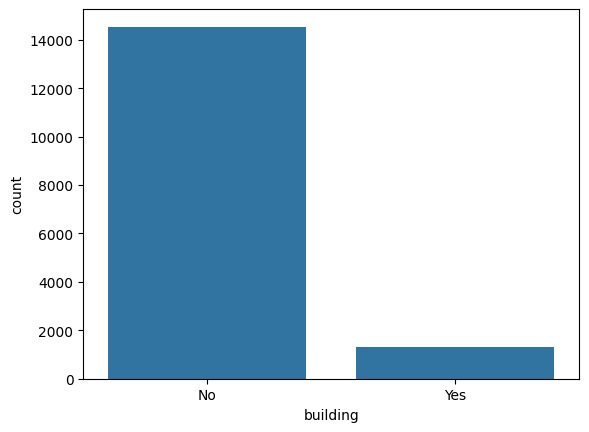

In [11]:
# Distribution of building column
sns.countplot(x='building',data=train_gdf)
plt.show()

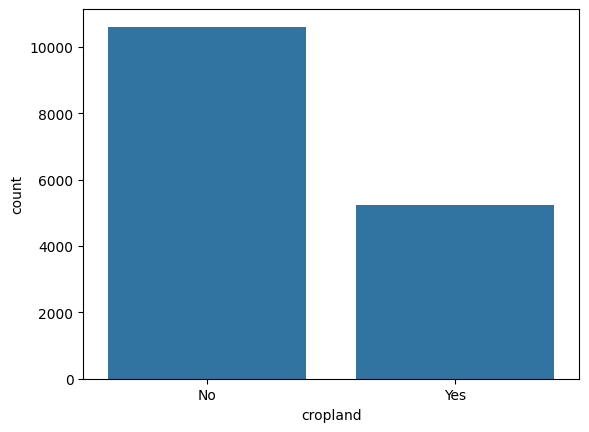

In [12]:

# Distribution of cropland column
sns.countplot(x='cropland',data=train_gdf)
plt.show()


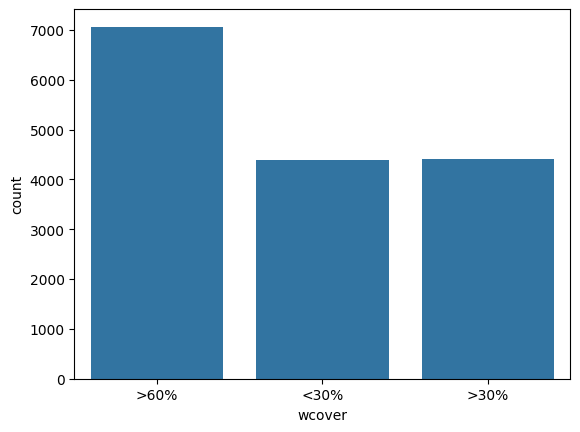

In [13]:
# Distribution of cropland column
sns.countplot(x='wcover',data=train_gdf)
plt.show()

#Data Preprocessing

## Handling the Target Variables

In [14]:
# Check rows where building is 'Yes' but cropland is also 'Yes' or wcover is '>60%'
building_crops = train_gdf[
    (train_gdf['building'] == 'Yes') &
    ((train_gdf['cropland'] == 'Yes'))
]
print("Rows where building is 'Yes' and are labeled as cropland:", len(building_crops))

Rows where building is 'Yes' and are labeled as cropland: 491


In [15]:
# Check rows where building is 'Yes' but cropland is also 'Yes' or wcover is '>60%'
violations_building = train_gdf[
    (train_gdf['building'] == 'Yes') &
    ((train_gdf['cropland'] == 'Yes') | (train_gdf['wcover'] == '>60%'))
]
print("Rows where building is 'Yes' but conflict with cropland or wcover (>60%):", len(violations_building))

Rows where building is 'Yes' but conflict with cropland or wcover (>60%): 796


 Locations with a "Yes" for building also have either cropland marked "Yes" or woody vegetation cover (">60%")

In [16]:
# Check rows where cropland is 'Yes' but building is also 'Yes' or wcover is '>60%'
violations_cropland = train_gdf[
    (train_gdf['cropland'] == 'Yes') &
    ((train_gdf['building'] == 'Yes') | (train_gdf['wcover'] == '>60%'))
]
print("Rows where cropland is 'Yes' but conflict with building or wcover (>60%):", len(violations_cropland))

Rows where cropland is 'Yes' but conflict with building or wcover (>60%): 2113


 Locations with a "Yes" for cropland also overlap with building "Yes" or wcover being ">60%"

In [17]:
# Check rows where wcover is '>60%' but building is 'Yes' or cropland is 'Yes'
violations_wcover = train_gdf[
    (train_gdf['wcover'] == '>60%') &
    ((train_gdf['building'] == 'Yes') | (train_gdf['cropland'] == 'Yes'))
]
print("Rows where wcover is '>60%' but conflict with building or cropland:", len(violations_wcover))

Rows where wcover is '>60%' but conflict with building or cropland: 2098


Locations with wcover as ">60%" also show building "Yes" or cropland "Yes".

Many locations have more than one positive indicator among the three target columns. This overlap suggests that a location can simultaneously exhibit characteristics of buildings, cropland, and high woody vegetation cover.





In [18]:
def assign_land_cover(row):
    # Priority: Building > Cropland > Woody vegetation cover
    if row['building'] == 'Yes':
        return 'Buildings'
    elif row['cropland'] == 'Yes':
        return 'Cropland'
    elif row['wcover'] == '>60%':
        return 'Woody'
    else:
        # This label handles cases that don't meet any criteria.
        return 'Other'

# Apply the function to create a new column in the training dataset
train_gdf['land_cover'] = train_gdf.apply(assign_land_cover, axis=1)

In [19]:
train_gdf['land_cover'].value_counts()

,count
land_cover,
Woody,4964
Other,4818
Cropland,4757
Buildings,1317


In [20]:
# Check the distribution of wcover values for rows classified as "Other"
other_distribution = train_gdf.loc[train_gdf['land_cover'] == 'Other', 'wcover'].value_counts()
print(other_distribution)


wcover
>30%    2566
<30%    2252
Name: count, dtype: int64


In [21]:
# Calculate NDVI
train_gdf['NDVI'] = np.where(
    (train_gdf['mb2'] + train_gdf['mb1']) == 0,
    0,
    (train_gdf['mb2'] - train_gdf['mb1']) / (train_gdf['mb2'] + train_gdf['mb1'])
)
# Calculate NDVI for test dataset
test_gdf['NDVI'] = np.where(
    (test_gdf['mb2'] + test_gdf['mb1']) == 0,
    0,
    (test_gdf['mb2'] - test_gdf['mb1']) / (test_gdf['mb2'] + test_gdf['mb1'])
)

In [22]:
# A function to refine Other in the target columns
def refine_other(row, ndvi_threshold=0.3):
    # If the row is already labeled as something other than "Other," leave it
    if row['land_cover'] != 'Other':
        return row['land_cover']

    # Check NDVI threshold
    if row['NDVI'] >= ndvi_threshold:
        return 'Woody'

    # Check plantation columns
    plantation_cols = ['lcc8','lcc9','lcc10','lcc11','lcc12','lcc13','lcc14']
    # If any of these columns has a value > 0, assume it's Cropland
    if any(row[col] > 0 for col in plantation_cols):
        return 'Cropland'

    # Otherwise, remain "Other"
    return 'Other'


In [23]:
train_gdf['landcover'] = train_gdf.apply(refine_other, axis=1)


In [24]:
print("Original land_cover distribution:")
print(train_gdf['land_cover'].value_counts())

print("\nRefined land_cover distribution:")
print(train_gdf['landcover'].value_counts())


Original land_cover distribution:
land_cover
Woody        4964
Other        4818
Cropland     4757
Buildings    1317
Name: count, dtype: int64

Refined land_cover distribution:
landcover
Woody        9780
Cropland     4757
Buildings    1317
Other           2
Name: count, dtype: int64


Initially classified target variable into four categories: Buildings, Cropland, Woody, and Other. "Other" included ambiguous cases that didn't clearly fit into the three main classes. To refine these cases, we:

Calculated NDVI:
NDVI (Normalized Difference Vegetation Index) is a measure of vegetation density, calculated as (NIR - Red) / (NIR + Red) using MODIS reflectance bands (mb2 for NIR and mb1 for Red).

Used Plantation Data:
Plantation counts (lcc8–lcc14) served as indicators for cropland.

Refined Classification:
Based on NDVI and plantation data, we reclassified most "Other" cases as either Woody or Cropland, then removed the remaining two ambiguous cases.

In [25]:
# Remove rows where the refined land_cover is "Other"
train_gdf = train_gdf[train_gdf['landcover'] != 'Other']

# Verify the new distribution
print(train_gdf['landcover'].value_counts())


landcover
Woody        9780
Cropland     4757
Buildings    1317
Name: count, dtype: int64


In [26]:
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15854 entries, 0 to 15855
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subid       15854 non-null  int64  
 1   lat         15854 non-null  float64
 2   lon         15854 non-null  float64
 3   building    15854 non-null  object 
 4   cropland    15854 non-null  object 
 5   wcover      15854 non-null  object 
 6   bcount      15854 non-null  float64
 7   x           15854 non-null  float64
 8   y           15854 non-null  float64
 9   bd20        15811 non-null  float64
 10  bio1        15854 non-null  int64  
 11  bio12       15854 non-null  int64  
 12  bio7        15854 non-null  int64  
 13  bio15       15854 non-null  int64  
 14  cec20       15811 non-null  float64
 15  dipa        15854 non-null  float64
 16  dni         15854 non-null  float64
 17  dnlt        15854 non-null  float64
 18  dnpa        15854 non-null  float64
 19  dor1        15854 non-null  fl

In [27]:
# Check for missing values in train dataset
train_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,43


In [28]:
# Check for missing values in test dataset
test_gdf.isnull().sum()

,0
subid,0
lat,0
lon,0
bcount,35
x,0
y,0
bd20,0
bio1,0
bio12,0
bio7,0


### Checking for patterns in the missing dataset

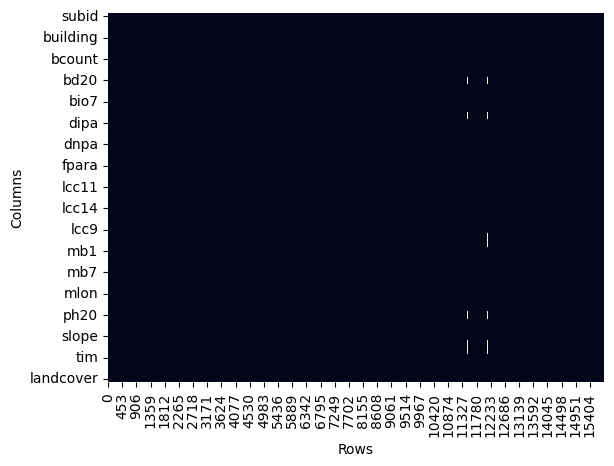

In [29]:
ax = plt.axes()
sns.heatmap(train_gdf.isna().transpose(), cbar=False, ax=ax)
plt. xlabel("Rows")
plt.ylabel("Columns")
plt.show()



In [30]:
missing_bd20 = train_gdf[train_gdf['bd20'].isnull()]
missing_cec20 = train_gdf[train_gdf['cec20'].isnull()]

# Check if the indexes (row IDs) are the same
print("Same missing rows for bd20 and cec20:", missing_bd20.index.equals(missing_cec20.index))


Same missing rows for bd20 and cec20: True


In [31]:
# Correlation of missingness
soil_cols = ['bd20', 'cec20', 'ph20', 'snd20', 'soc20']
missing_corr = train_gdf[soil_cols].isnull().astype(int).corr()
print("Correlation of missingness in soil columns:")
print(missing_corr)


Correlation of missingness in soil columns:
       bd20  cec20  ph20  snd20  soc20
bd20    1.0    1.0   1.0    1.0    1.0
cec20   1.0    1.0   1.0    1.0    1.0
ph20    1.0    1.0   1.0    1.0    1.0
snd20   1.0    1.0   1.0    1.0    1.0
soc20   1.0    1.0   1.0    1.0    1.0


In [32]:
soil_missing = train_gdf[soil_cols].isnull()
common_missing = soil_missing.all(axis=1)
print("Number of rows missing in all soil columns:", common_missing.sum())


Number of rows missing in all soil columns: 43


43 out of 15,856 rows (approximately 0.3%) had missing values in all soil-related columns (bd20, cec20, ph20, snd20, soc20). Since these missing values occurred in the same rows, we considered the issue systematic rather than random. Given the very small percentage, we opted to drop these rows to maintain data consistency.









In [33]:
# Dropping the missing values in the soil related columns
train_gdf = train_gdf[~(train_gdf["bd20"].isna()) &
      ~(train_gdf["cec20"].isna()) &
      ~(train_gdf["ph20"].isna()) &
      ~(train_gdf["snd20"].isna()) &
      ~(train_gdf["soc20"].isna())

]

In [34]:
train_gdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subid       15811 non-null  int64  
 1   lat         15811 non-null  float64
 2   lon         15811 non-null  float64
 3   building    15811 non-null  object 
 4   cropland    15811 non-null  object 
 5   wcover      15811 non-null  object 
 6   bcount      15811 non-null  float64
 7   x           15811 non-null  float64
 8   y           15811 non-null  float64
 9   bd20        15811 non-null  float64
 10  bio1        15811 non-null  int64  
 11  bio12       15811 non-null  int64  
 12  bio7        15811 non-null  int64  
 13  bio15       15811 non-null  int64  
 14  cec20       15811 non-null  float64
 15  dipa        15811 non-null  float64
 16  dni         15811 non-null  float64
 17  dnlt        15811 non-null  float64
 18  dnpa        15811 non-null  float64
 19  dor1        15811 non-null  fl

## Deep dive into lstd (Average day-time land surface temp. (deg. C , 2001-2020)) and lstn columns (Average night-time land surface temp. (deg. C, 2001-2020))


In [35]:
# Identify the rows with missing values in lstd or lstn
missing_mask = train_gdf['lstd'].isnull() | train_gdf['lstn'].isnull()
missing_rows = train_gdf[missing_mask]
missing_rows[['subid', 'lat', 'lon', 'lstd', 'lstn']]

,subid,lat,lon,lstd,lstn
1591,1547301,5.201036,-3.336148,NaN,NaN
1785,1547106,5.158228,-4.750843,NaN,NaN
2633,1546251,5.233256,-4.518274,NaN,NaN
6733,1541643,5.225401,-5.308266,NaN,NaN
6850,1541525,5.211316,-5.157389,NaN,NaN
6914,1541461,5.307599,-4.124199,NaN,NaN
8800,1539574,5.302855,-4.431010,NaN,NaN
8833,1539541,5.210890,-4.346546,NaN,NaN
9698,1538676,5.327656,-4.120380,NaN,NaN
10601,1537772,4.432429,-7.323420,NaN,NaN


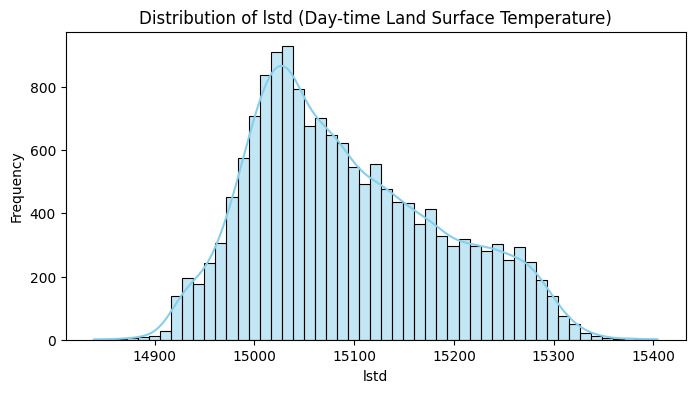

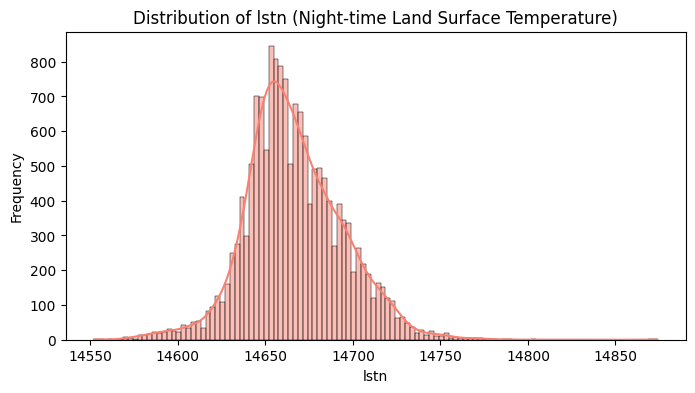

In [36]:
# Distribution for lstd
plt.figure(figsize=(8,4))
sns.histplot(train_gdf['lstd'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of lstd (Day-time Land Surface Temperature)')
plt.xlabel('lstd')
plt.ylabel('Frequency')
plt.show()

# Distribution for lstn
plt.figure(figsize=(8,4))
sns.histplot(train_gdf['lstn'].dropna(), kde=True, color='salmon')
plt.title('Distribution of lstn (Night-time Land Surface Temperature)')
plt.xlabel('lstn')
plt.ylabel('Frequency')
plt.show()

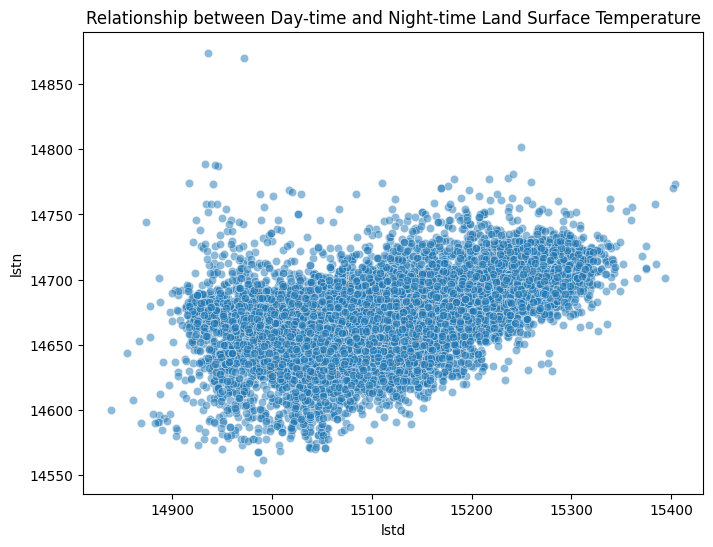

In [37]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=train_gdf, x='lstd', y='lstn', alpha=0.5)
plt.title('Relationship between Day-time and Night-time Land Surface Temperature')
plt.xlabel('lstd')
plt.ylabel('lstn')
plt.show()


In [38]:
missing_geo = missing_rows[['lat', 'lon']]
print("Geographic coordinates of missing rows:")
print(missing_geo)


Geographic coordinates of missing rows:
            lat       lon
1591   5.201036 -3.336148
1785   5.158228 -4.750843
2633   5.233256 -4.518274
6733   5.225401 -5.308266
6850   5.211316 -5.157389
6914   5.307599 -4.124199
8800   5.302855 -4.431010
8833   5.210890 -4.346546
9698   5.327656 -4.120380
10601  4.432429 -7.323420
14475  5.186862 -4.576462
14753  5.212438 -4.542843


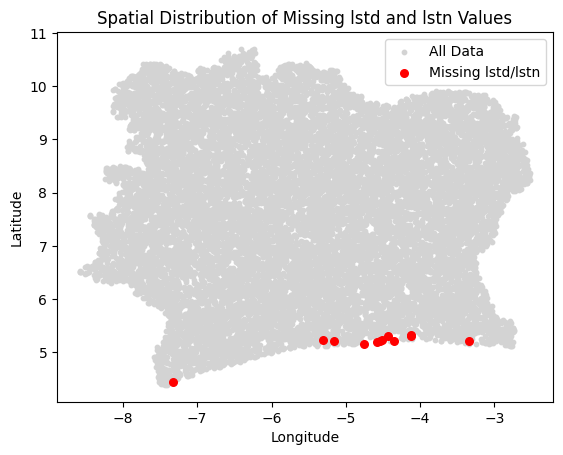

In [39]:
# Investigate spatial patterns by plotting the missing rows on a map
plt.figure()
# Plot all points in light gray
plt.scatter(train_gdf['lon'], train_gdf['lat'], c='lightgray', s=10, label='All Data')
# Highlight the points with missing lstd/lstn in red
plt.scatter(missing_rows['lon'], missing_rows['lat'], c='red', s=30, label='Missing lstd/lstn')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Missing lstd and lstn Values")
plt.legend()
plt.show()

The points are along or near the southern/southwestern coast, with one row farther west at (4.432429, -7.323420).
This could be caused by Persistent cloud cover, coastal influence, or a data-source retrieval issue (e.g., MODIS or other satellite-based products) might explain why day/night LST values were not retrieved for those specific pixels.

We will use KNNImputer, which will include latitude (lat), longitude (lon), and elevation (mdem), the imputer will look for the closest points and average their known LST values. This helps capture coastal vs inland differences better

In [40]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Select columns relevant for imputation
features_for_imputation = ['lstd', 'lstn', 'lat', 'lon', 'mdem', 'NDVI']

# Extract a subset DataFrame
df_impute = train_gdf[features_for_imputation].copy()

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_impute)

# Apply KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5, weights='distance')
df_imputed = knn_imputer.fit_transform(df_scaled)

#Inverse transform to get back to original scale
df_imputed_unscaled = scaler.inverse_transform(df_imputed)

# Put imputed values back into the original DataFrame
imputed_df = pd.DataFrame(df_imputed_unscaled, columns=features_for_imputation, index=df_impute.index)
train_gdf['lstd'] = imputed_df['lstd']
train_gdf['lstn'] = imputed_df['lstn']



In [41]:
# Checking if there are any missing values
train_gdf.isna().sum()



,0
subid,0
lat,0
lon,0
building,0
cropland,0
wcover,0
bcount,0
x,0
y,0
bd20,0


In [42]:
# Veryfying the missing values have been imputed
train_gdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15811 entries, 0 to 15855
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   subid       15811 non-null  int64  
 1   lat         15811 non-null  float64
 2   lon         15811 non-null  float64
 3   building    15811 non-null  object 
 4   cropland    15811 non-null  object 
 5   wcover      15811 non-null  object 
 6   bcount      15811 non-null  float64
 7   x           15811 non-null  float64
 8   y           15811 non-null  float64
 9   bd20        15811 non-null  float64
 10  bio1        15811 non-null  int64  
 11  bio12       15811 non-null  int64  
 12  bio7        15811 non-null  int64  
 13  bio15       15811 non-null  int64  
 14  cec20       15811 non-null  float64
 15  dipa        15811 non-null  float64
 16  dni         15811 non-null  float64
 17  dnlt        15811 non-null  float64
 18  dnpa        15811 non-null  float64
 19  dor1        15811 non-null  fl

## Deep Dive into lat, lon and mlat and mlon columns

In [43]:
# A subset of the four columns
train_gdf[["lat","lon", "mlat","mlon"]].head(10)

,lat,lon,mlat,mlon
0,7.387687,-4.780390,7.388742,-4.781606
1,8.690266,-5.770243,8.691314,-5.771476
2,8.518763,-2.808147,8.519824,-2.809363
3,8.637725,-3.048867,8.638784,-3.050085
4,7.993474,-6.044227,7.994523,-6.045455
5,7.219553,-3.349626,7.220614,-3.350835
6,6.794609,-4.073888,6.795668,-4.075096
7,9.625816,-3.809691,9.626870,-3.810922
8,8.944514,-3.142914,8.945573,-3.144136
9,7.737685,-6.434330,7.738732,-6.435557


### Let compare the four columns, and see the difference. We will use Mean Absolute difference in latitude and longitude

In [44]:
# Compare lat vs. mlat
lat_diff = (train_gdf['lat'] - train_gdf['mlat']).abs()
lon_diff = (train_gdf['lon'] - train_gdf['mlon']).abs()

print("Mean absolute difference in latitude:", lat_diff.mean())
print("Mean absolute difference in longitude:", lon_diff.mean())


Mean absolute difference in latitude: 0.001051072155990653
Mean absolute difference in longitude: 0.0012222703553230398


The difference in latitude and longitude are too smll. According to GIS StackExchanage , practitionaers have noted that when differences are on the order of 0.001 (which typically equates to roughly 100-110 meters at most) it isnt necessary to switch coordinate systems unless the analysis demands extremely high spatial precision.

This approach is supported by GIS professionals who point out that differences at the 0.001° level are generally negligible for most analyses, as detailed in the Wikipedia article on Decimal Degrees and discussions on GIS StackExchange.(https://en.wikipedia.org/wiki/Decimal_degrees


In [45]:
# We drop the mlat and mlon
train_gdf = train_gdf.drop(columns=['mlat', 'mlon'])
test_gdf = test_gdf.drop(columns=['mlat', 'mlon'])

## Deep Dive into the Columns with no Description

In [46]:
## A subset of the columns with no description
train_gdf[["x","y", "bcount","dnlt","nppm","sirs"]].head(10)


,x,y,bcount,dnlt,nppm,sirs
0,-2.714375e+06,321874.969864,0.0,0.500000,5052.299805,0.008259
1,-2.812625e+06,474124.973063,0.0,3.913119,5316.700195,0.007242
2,-2.495125e+06,440374.986977,0.0,7.615773,4519.700195,0.006744
3,-2.520375e+06,454875.008083,0.0,7.591113,3439.800049,0.007917
4,-2.846625e+06,396624.944149,0.0,0.000000,5226.899902,0.007022
5,-2.560875e+06,296374.982792,0.0,1.250000,4088.899902,0.007156
6,-2.641375e+06,251625.046786,0.0,0.000000,5630.600098,0.007713
7,-2.595875e+06,569875.044968,0.0,3.691206,2612.500000,0.007078
8,-2.528625e+06,489875.029340,0.0,3.010399,3277.800049,0.007249
9,-2.890125e+06,369625.020345,0.0,3.250000,5506.899902,0.006950


In [47]:
train_gdf[["x","y", "lat","lon"]].head(10)


,x,y,lat,lon
0,-2.714375e+06,321874.969864,7.387687,-4.780390
1,-2.812625e+06,474124.973063,8.690266,-5.770243
2,-2.495125e+06,440374.986977,8.518763,-2.808147
3,-2.520375e+06,454875.008083,8.637725,-3.048867
4,-2.846625e+06,396624.944149,7.993474,-6.044227
5,-2.560875e+06,296374.982792,7.219553,-3.349626
6,-2.641375e+06,251625.046786,6.794609,-4.073888
7,-2.595875e+06,569875.044968,9.625816,-3.809691
8,-2.528625e+06,489875.029340,8.944514,-3.142914
9,-2.890125e+06,369625.020345,7.737685,-6.434330


In [48]:
# Checking categories in the bcount
train_gdf["bcount"].value_counts()


,count
bcount,
0.0,14509
1.0,277
2.0,156
3.0,128
4.0,70
...,...
142.0,1
84.0,1
90.0,1


In [49]:
zero_percentage = (train_gdf['bcount'] == 0).sum() / len(train_gdf) * 100
print(f"Percentage of zeros: {zero_percentage:.2f}%")


Percentage of zeros: 91.77%


In [50]:
train_gdf[["x","y", "bcount","dnlt","nppm","sirs"]].describe().T


,count,mean,std,min,25%,50%,75%,max
x,15811.0,-2.795723e+06,161316.724844,-3.128125e+06,-2.932875e+06,-2.806375e+06,-2.658625e+06,-2.465125e+06
y,15811.0,3.546411e+05,167318.405124,-6.374980e+03,2.180000e+05,3.591250e+05,4.922500e+05,7.043751e+05
bcount,15811.0,1.923914e+00,13.960900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.470000e+02
dnlt,15811.0,5.263292e+00,6.129073,0.000000e+00,1.346291e+00,3.354102e+00,6.887483e+00,5.165087e+01
nppm,15811.0,5.807930e+03,3288.606563,0.000000e+00,3.390100e+03,5.210000e+03,7.338350e+03,1.412360e+04
sirs,15811.0,7.303091e-03,0.000874,0.000000e+00,6.969394e-03,7.205550e-03,7.535017e-03,1.151892e-02


## Feature Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder
# Perform label encoding on landcover column
label_encoder = LabelEncoder()
train_gdf['landcover_encoded'] = label_encoder.fit_transform(train_gdf['landcover'])

In [52]:
# Drop the original target columns if no longer needed
train_gdf = train_gdf.drop(columns=['building', 'cropland', 'wcover','land_cover'])

train_gdf.columns


Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim', 'NDVI', 'landcover', 'landcover_encoded'],
      dtype='object')

In [53]:
# I suspect dnlt to be day night light. Let me check it correlation with building
train_gdf[['dnlt', 'bcount']].corr()


,dnlt,bcount
dnlt,1.000000,-0.076438
bcount,-0.076438,1.000000


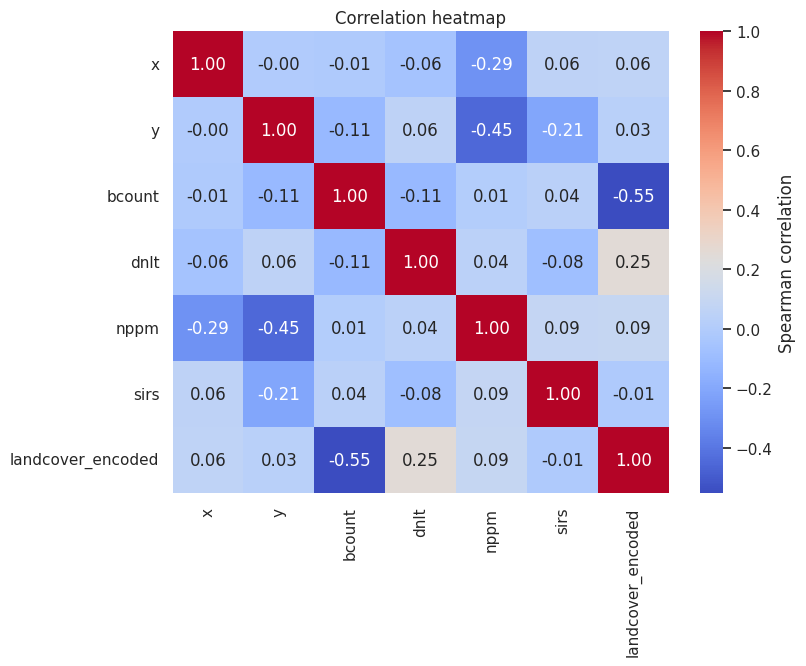

In [54]:
columns_of_interest = ["x","y", "bcount","dnlt","nppm","sirs","landcover_encoded"]
correlation_matrix = train_gdf[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

bcount and sirs show moderate to strong correlation with the target. dnlt and nppm have weak correlation.


## Checking for Duplicates

In [55]:
## Checking for Duplicates
train_gdf.duplicated().sum()



0

In [56]:
test_gdf.duplicated().sum()


0

In [57]:
train_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,ph20,sirm,sirs,slope,snd20,soc20,tim,NDVI,landcover,landcover_encoded
0,1548937,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,...,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082,0.507929,Woody,2
1,1548936,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,...,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431,0.551397,Cropland,1
2,1548935,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,...,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131,0.555875,Cropland,1
3,1548934,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,...,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363,0.526146,Woody,2
4,1548933,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,...,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859,0.514986,Woody,2


## Bcount has missing values in the test set.

In [58]:
train_gdf['bcount'].value_counts()


,count
bcount,
0.0,14509
1.0,277
2.0,156
3.0,128
4.0,70
...,...
142.0,1
84.0,1
90.0,1


In [59]:
# Imputing bcount with the median
median_bcount = train_gdf['bcount'].median()
test_gdf['bcount'] = test_gdf['bcount'].fillna(median_bcount)


In [60]:
test_gdf.isna().sum()

,0
subid,0
lat,0
lon,0
bcount,0
x,0
y,0
bd20,0
bio1,0
bio12,0
bio7,0


In [61]:
test_gdf.columns


Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim', 'NDVI'],
      dtype='object')

In [62]:
train_gdf.columns

Index(['subid', 'lat', 'lon', 'bcount', 'x', 'y', 'bd20', 'bio1', 'bio12',
       'bio7', 'bio15', 'cec20', 'dipa', 'dni', 'dnlt', 'dnpa', 'dor1', 'dor2',
       'fpara', 'fpars', 'lcc10', 'lcc11', 'lcc12', 'lcc13', 'lcc14', 'lcc21',
       'lcc8', 'lcc9', 'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'mdem',
       'nppm', 'npps', 'ph20', 'sirm', 'sirs', 'slope', 'snd20', 'soc20',
       'tim', 'NDVI', 'landcover', 'landcover_encoded'],
      dtype='object')

In [63]:
train_gdf.shape, test_gdf.shape

((15811, 47), (35, 45))

In [66]:
# Saving the clean dataset
train_gdf.to_csv('clean_train.csv',index=False)
test_gdf.to_csv('clean_test.csv', index=False)


## Exploratory Data Analysis

In [67]:
train_gdf.head()

,subid,lat,lon,bcount,x,y,bd20,bio1,bio12,bio7,...,ph20,sirm,sirs,slope,snd20,soc20,tim,NDVI,landcover,landcover_encoded
0,1548937,7.387687,-4.780390,0.0,-2.714375e+06,321874.969864,1.4900,262,1006,58,...,6.100,0.717054,0.008259,0.729217,66.75,12.25,8.079082,0.507929,Woody,2
1,1548936,8.690266,-5.770243,0.0,-2.812625e+06,474124.973063,1.2925,257,1118,70,...,5.575,0.717198,0.007242,1.086981,51.50,14.25,9.549431,0.551397,Cropland,1
2,1548935,8.518763,-2.808147,0.0,-2.495125e+06,440374.986977,1.3050,265,930,66,...,5.850,0.717171,0.006744,1.159993,47.00,14.50,10.523131,0.555875,Cropland,1
3,1548934,8.637725,-3.048867,0.0,-2.520375e+06,454875.008083,1.3275,263,875,67,...,5.950,0.718244,0.007917,2.471163,62.75,12.75,9.305363,0.526146,Woody,2
4,1548933,7.993474,-6.044227,0.0,-2.846625e+06,396624.944149,1.4200,260,1073,60,...,5.800,0.716653,0.007022,0.259416,55.00,13.25,15.732859,0.514986,Woody,2


In [68]:
# Ensure the 'landcover' column is treated as categorical
train_gdf['landcover'] = train_gdf['landcover'].astype('category')

##  How are the land cover classes distributed geographically?
In this Research question, we are looking at how the land cover classes(building, cropland,woody vegetation) are distributed geographicallly across the region.

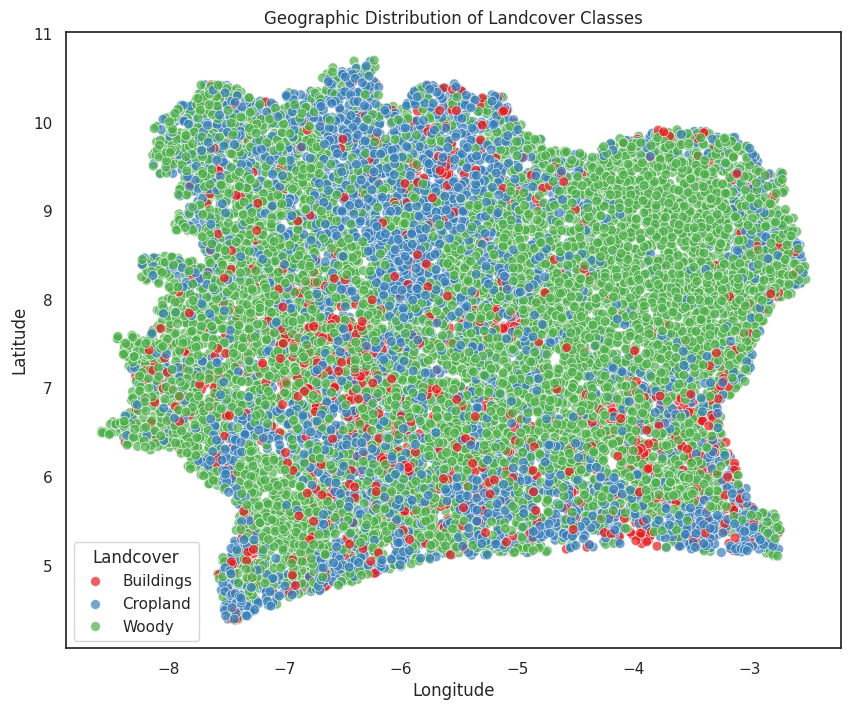

In [69]:
# Question: How are the land cover classes distributed geographically?
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_gdf, x='lon', y='lat', hue='landcover', palette='Set1', alpha=0.7, s=50)
plt.title("Geographic Distribution of Landcover Classes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Landcover")
plt.show()

From this scatter plot :

* Buildings (red) appear relatively sparse and localized in clusters, reflecting the fact that "building" was the smallest class in the dataset. These points likely represent urban or developed areas.

* Cropland (blue) and Woody (green) collectively dominate most of the region. While there is some intermixing, you can see broad areas where cropland or woody vegetation are more prevalent, indicating that farmland and forested zones are distributed throughout the region.

* There is no single, stark boundary between cropland and woody vegetation, suggesting a gradual transition or mosaic of these land cover types. Meanwhile, the scattered nature of building points underscores their minority status in the dataset.

## 2. Which environmental/remote sensing features correlate with land cover classes?
The correlation matrix which show how key environmental features relate to one another.

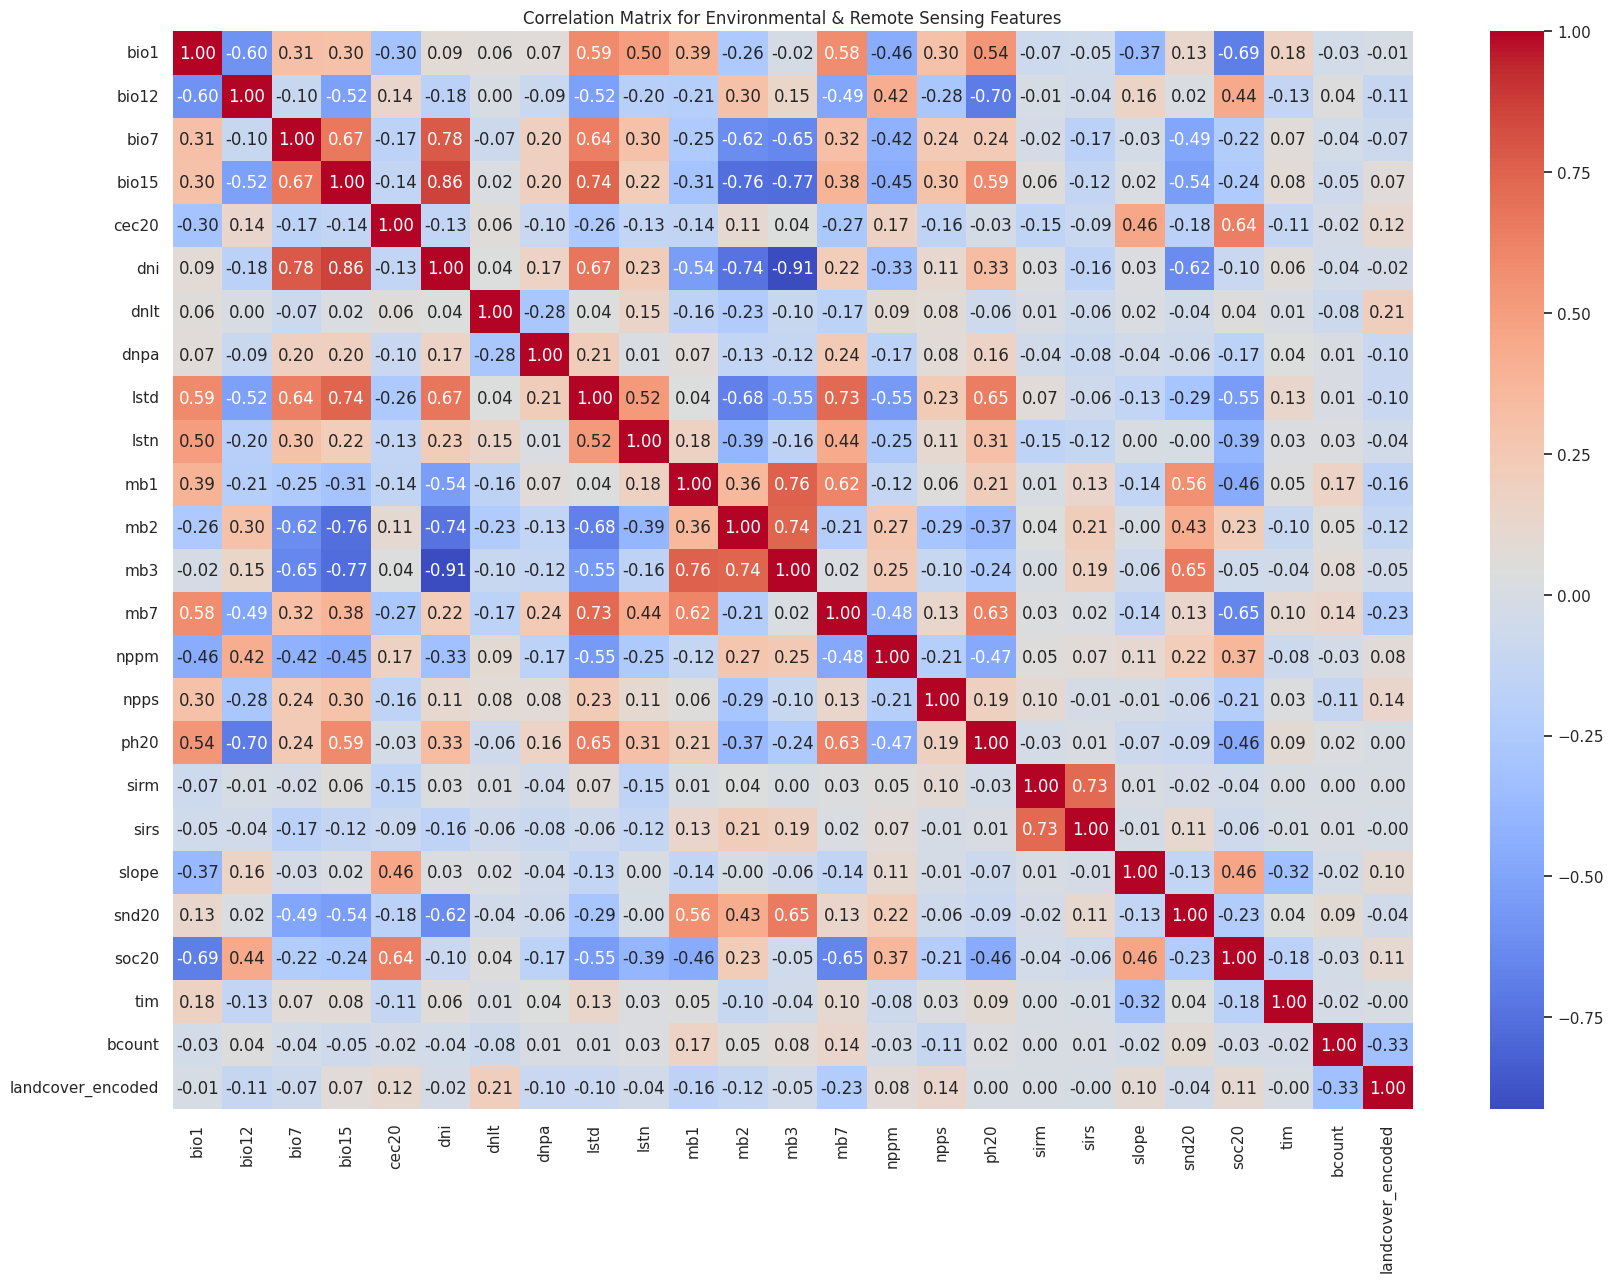

In [71]:
# Extract evironmental features
env_features = ['bio1', 'bio12', 'bio7', 'bio15', 'cec20', 'dni', 'dnlt', 'dnpa',
                'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'nppm', 'npps', 'ph20',
                'sirm', 'sirs', 'slope', 'snd20', 'soc20', 'tim', 'bcount','landcover_encoded']
corr_matrix =train_gdf[env_features].corr()

plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Environmental & Remote Sensing Features")
plt.show()

bcount shows the strongest positive correlation with landcover_encoded. This aligns with our previous findings that building density is a major driver of land cover classification (especially for the “building” label).

Some variables (e.g., certain remote-sensing features like dnlt, mb2, or topographic variables like slope) have modest positive or negative correlations with the target. This suggests they provide useful—but not overwhelming—signal in distinguishing among the “cropland,” “woody,” and “building” classes.

Several features (e.g., some soil properties or climate variables) show near-zero correlation with landcover_encoded. They may still contribute in interaction with other features, but individually they don’t strongly separate the classes.

In [72]:
# 2. Environmental and Remote Sensing Influences with Encoded Target
env_features = [
    'bio1', 'bio12', 'bio7', 'bio15', 'cec20', 'dni', 'dnlt', 'dnpa',
    'lstd', 'lstn', 'mb1', 'mb2', 'mb3', 'mb7', 'nppm', 'npps', 'ph20',
    'sirm', 'sirs', 'slope', 'snd20', 'soc20', 'tim', 'bcount'
]

# Include the encoded target in the correlation
if 'landcover_encoded' in train_gdf.columns:
    features_with_target = env_features + ['landcover_encoded']
    corr_matrix_target = train_gdf[features_with_target].corr()

    # Extract correlations with landcover_encoded
    target_corr = corr_matrix_target['landcover_encoded'].sort_values(ascending=False)
    print("Correlation of environmental features with the encoded landcover:\n", target_corr)



Correlation of environmental features with the encoded landcover:
 landcover_encoded    1.000000
dnlt                 0.206992
npps                 0.139925
cec20                0.116285
soc20                0.107865
slope                0.096672
nppm                 0.080380
bio15                0.065649
sirm                 0.003610
ph20                 0.002460
tim                 -0.001274
sirs                -0.004357
bio1                -0.005420
dni                 -0.021077
lstn                -0.041221
snd20               -0.042356
mb3                 -0.045579
bio7                -0.070502
dnpa                -0.098701
lstd                -0.098796
bio12               -0.107128
mb2                 -0.119571
mb1                 -0.162012
mb7                 -0.228531
bcount              -0.328499
Name: landcover_encoded, dtype: float64



* Soil organic carbon (soc20) and net primary productivity (nppm) trend positively with “woody” class.

* Several moderate or low correlations highlight that many features provide subtle or secondary signals about landcover differences.
THe result show that bcount fits our assumption, in that building-dominated pixels differ sharply from natural vegetation in terms of building count, reflectance, and land surface temperature, while woody vegetation often has higher organic carbon, slope, and productivity values.

## 3. How does building count (bcount) influence land cover?
In this we are looking at the Impact of Urbanization. In this case we are taking the column bcount to be building count.


<ipython-input-73-461d4c9bd045>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='bcount', data=train_gdf, palette='Set2')


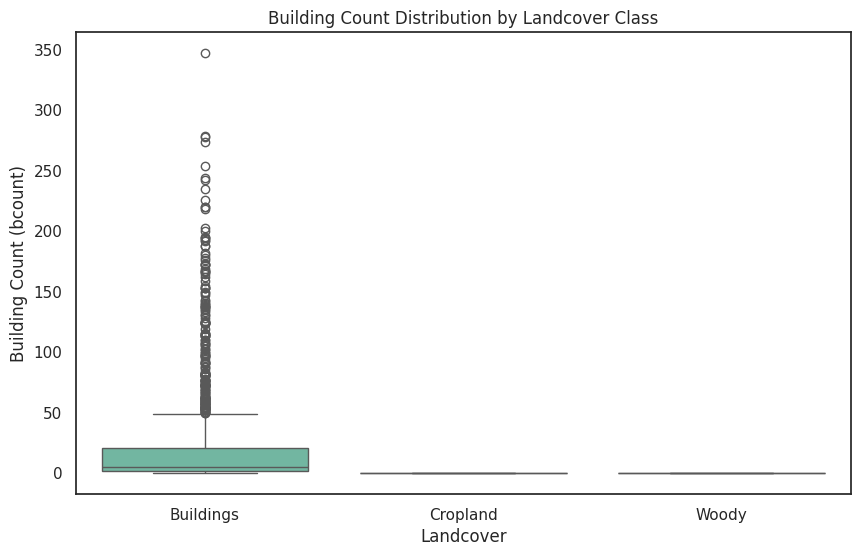

In [73]:
# Plot building count distribution by landcover
plt.figure(figsize=(10, 6))
sns.boxplot(x='landcover', y='bcount', data=train_gdf, palette='Set2')
plt.title("Building Count Distribution by Landcover Class")
plt.xlabel("Landcover")
plt.ylabel("Building Count (bcount)")
plt.show()

From the boxplot, building-labeled observations have notably higher building counts (bcount) than cropland or woody observations, which hover near zero. Several outliers in the building class extend beyond 50 or even 100, indicating some areas with exceptionally high building density. Meanwhile, cropland and woody vegetation cells generally have little to no buildings recorded.

## 4. What is the relationship between topography/soil properties and land cover?
in this we are looking at the role of Topography and Soil Characteristics, by exploring the slope and elevation(mdem) with respect to landcover.

<ipython-input-74-f86a4a3b1fb6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='slope', data=train_gdf, palette='Pastel1')
<ipython-input-74-f86a4a3b1fb6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='landcover', y='mdem', data=train_gdf, palette='Pastel2')


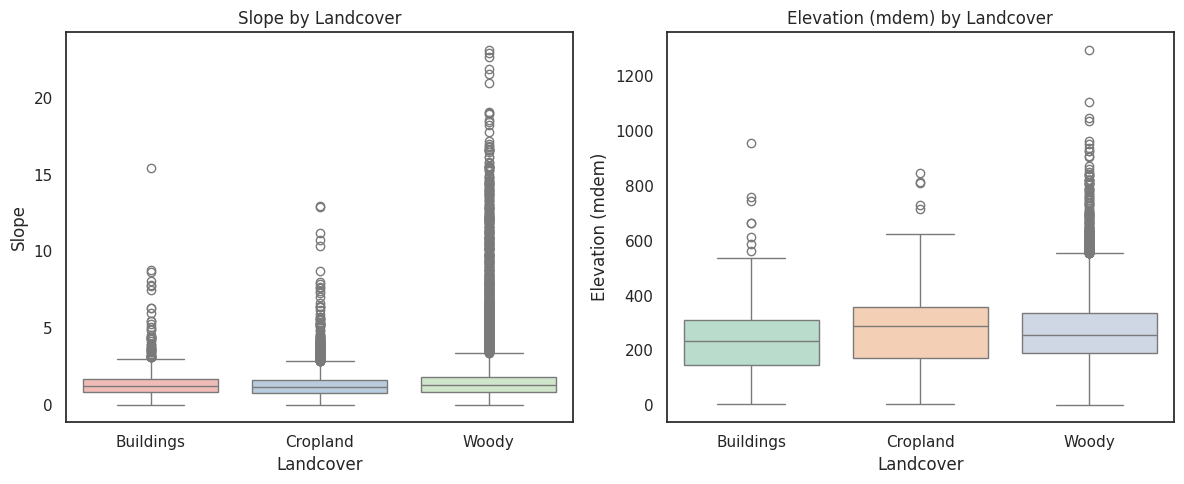

In [74]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='landcover', y='slope', data=train_gdf, palette='Pastel1')
plt.title("Slope by Landcover")
plt.xlabel("Landcover")
plt.ylabel("Slope")

plt.subplot(1, 2, 2)
sns.boxplot(x='landcover', y='mdem', data=train_gdf, palette='Pastel2')
plt.title("Elevation (mdem) by Landcover")
plt.xlabel("Landcover")
plt.ylabel("Elevation (mdem)")
plt.tight_layout()
plt.show()

From the slope boxplot (left panel):

* Buildings tend to occupy flatter areas, with lower median slope values and fewer outliers.

* Cropland has a slightly higher median slope than buildings, but still relatively moderate.

* Woody vegetation shows the highest range of slopes, suggesting that forested areas extend into steeper terrains.


From the elevation (mdem) boxplot (right panel):

* Building observations cluster around lower elevations overall.

* Cropland typically appears at mid-range elevations, higher than most building points.

* Woody vegetation spans the highest elevations among the three classes, indicating that forest cover persists in more elevated, possibly hilly or mountainous areas.

## Do the undocumented features (e.g., dnlt, nppm, sirs) add value?

To check if the undocumented features add any value, we will check their distributions and correlations with the target variable.

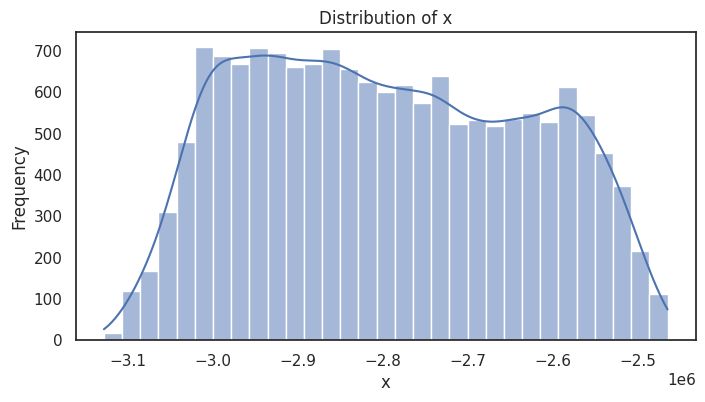

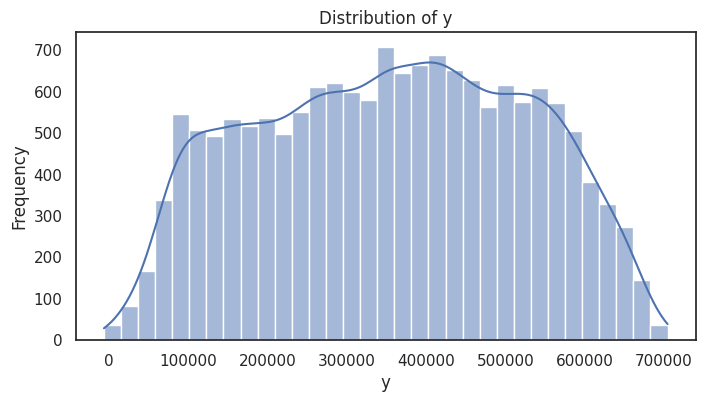

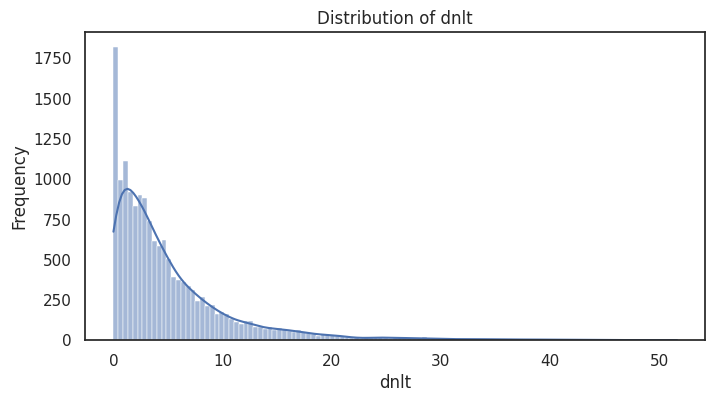

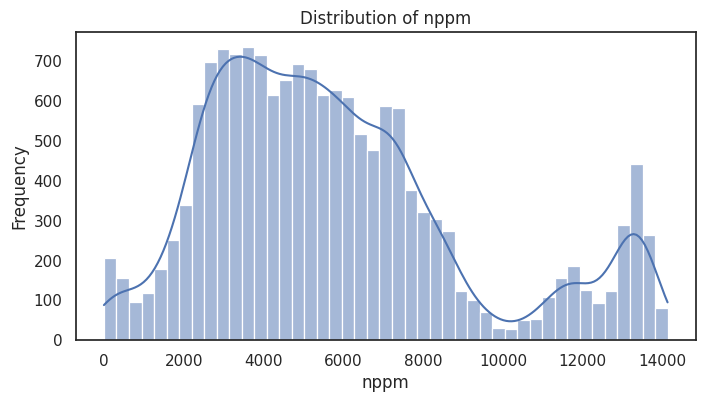

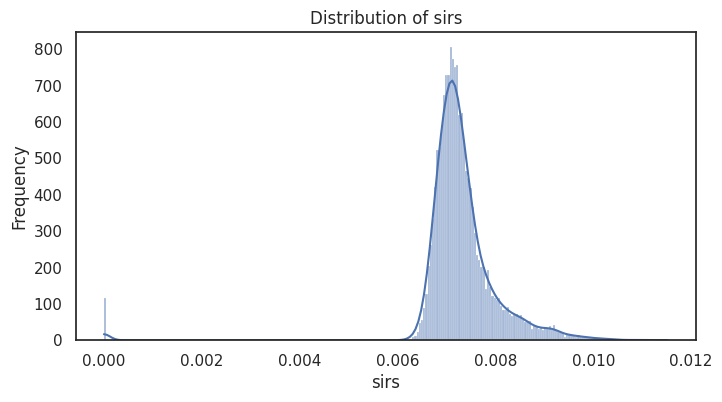

In [75]:
undoc_features = ['x','y','dnlt', 'nppm', 'sirs']
for feat in undoc_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(train_gdf[feat], kde=True)
    plt.title(f"Distribution of {feat}")
    plt.xlabel(feat)
    plt.ylabel("Frequency")
    plt.show()


x,y

* They both appear to have near-bell‐shaped or plateaued distributions, indicating the dataset covers a broad, continuous region in these projected coordinates ( assuming they are projected coordinates)

dnlt:
* It is Heavily right-skewed distribution, with a large spike near zero and a tail stretching up to 50.
This shape suggests most locations have very low dnlt values, but a minority of observations have significantly higher readings.

nppm:

* Exhibits multiple peaks (bimodal or multimodal).
Such a distribution could reflect different ecological or climatic zones with distinct levels of net primary productivity.
In land cover classification, nppm may help differentiate heavily vegetated (woody) areas from sparser cropland or built-up regions.

sirs:

* Very tight distribution around 0.006, with a few outliers near 0.0 and 0.01.
This narrow range means most locations share similar values, though small differences might still be relevant if they systematically separate classes.


In [76]:
for feat in undoc_features:
    corr_value = train_gdf[[feat, 'landcover_encoded']].corr().iloc[0, 1]
    print(f"{feat} correlation with landcover_encoded: {corr_value:.2f}")


x correlation with landcover_encoded: 0.06
y correlation with landcover_encoded: 0.05
dnlt correlation with landcover_encoded: 0.21
nppm correlation with landcover_encoded: 0.08
sirs correlation with landcover_encoded: -0.00


* x and y have low correlation, but despite this they may still help the model in non-linear ways—especially if certain land covers are more common in certain regions.

* dnlt & nppm: These moderately positive correlations confirm that higher values are more characteristic of the “woody” class, reinforcing their utility in distinguishing forested areas.

* sirs: No linear separation is evident